In [6]:
import pandas as pd
import os

# Load the dataset
dataset_path = 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/line_index_female.tsv'  # Path to your CSV file
audio_directory = 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female'  # Directory containing the audio files

# Read the CSV file
dataset = pd.read_csv(dataset_path, delimiter='\t', names=['audio', 'transcription'])

# Construct full audio file paths
audio_files = [os.path.join(audio_directory, file_name).replace('\\', '/') + '.wav' for file_name in dataset['audio'].tolist()]
transcriptions = dataset['transcription'].tolist()
audio_files


['D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_03209_00443170675.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_01414_00718082800.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_06488_01774311059.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_04741_00793786490.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_04693_00585676293.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_03209_00518181688.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_02858_01737907577.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_09152_01845652861.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_01414_01985567898.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/gu_in_female/guf_05004_00909328612.wav',
 'D:/Speech-To-Text Using RNN/Speech-To-

In [7]:
#Audio preprocessing MFCC Use

import librosa
import numpy as np

def extract_mfcc(file_path, sr=16000, n_mfcc=13):
    audio, _ = librosa.load(file_path, sr=sr) 
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfcc_features.T

audio_features = [extract_mfcc(audio_file) for audio_file in audio_files]


In [8]:
audio_features

[array([[-657.4885   ,    7.877404 ,    7.612443 , ...,    2.179213 ,
            1.5966461,    1.1349404],
        [-657.098    ,    8.43762  ,    8.195311 , ...,    2.8547826,
            2.1857152,    1.6069512],
        [-659.03204  ,    5.7568455,    5.6747494, ...,    3.499141 ,
            3.1262906,    2.7543979],
        ...,
        [-650.36206  ,   17.86826  ,   17.345968 , ...,    6.511219 ,
            5.208149 ,    4.0629215],
        [-651.34247  ,   16.478405 ,   15.947356 , ...,    5.467383 ,
            4.3098426,    3.322824 ],
        [-657.94366  ,    7.2410116,    6.9978676, ...,    2.0073647,
            1.4428737,    0.9680356]], dtype=float32),
 array([[-7.70034973e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.70034973e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.70034973e+02,  0.00000000e+00,  0.00000000e+00, ...,
     

In [9]:
# Calculate the maximum length of audio features
max_audio_length = max([feature.shape[0] for feature in audio_features])

from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore

tokenizer = Tokenizer(char_level=True)  
tokenizer.fit_on_texts(transcriptions) 
tokenized_transcriptions = tokenizer.texts_to_sequences(transcriptions)

#maximum length of transcriptions
transcription_lengths = [len(seq) for seq in tokenized_transcriptions]
percentile_transcription_length = int(np.percentile(transcription_lengths, 90)) 


In [10]:
max
transcription_lengths

[43,
 37,
 41,
 53,
 67,
 55,
 60,
 56,
 107,
 42,
 84,
 51,
 46,
 107,
 43,
 99,
 42,
 90,
 41,
 67,
 84,
 44,
 87,
 57,
 46,
 76,
 23,
 45,
 46,
 40,
 64,
 72,
 54,
 60,
 123,
 47,
 48,
 58,
 48,
 86,
 91,
 45,
 36,
 55,
 73,
 82,
 93,
 37,
 21,
 83,
 74,
 48,
 42,
 24,
 71,
 89,
 36,
 41,
 115,
 42,
 72,
 48,
 92,
 84,
 46,
 38,
 42,
 15,
 40,
 45,
 10,
 72,
 44,
 68,
 42,
 96,
 73,
 42,
 71,
 107,
 42,
 52,
 39,
 45,
 103,
 112,
 58,
 39,
 88,
 60,
 57,
 49,
 74,
 41,
 78,
 120,
 100,
 68,
 121,
 53,
 94,
 101,
 44,
 59,
 48,
 65,
 58,
 44,
 37,
 110,
 101,
 63,
 71,
 105,
 64,
 109,
 86,
 106,
 66,
 99,
 42,
 59,
 49,
 43,
 103,
 42,
 53,
 41,
 37,
 47,
 65,
 79,
 17,
 58,
 41,
 60,
 46,
 45,
 49,
 66,
 81,
 44,
 40,
 41,
 87,
 43,
 90,
 45,
 55,
 11,
 113,
 72,
 48,
 40,
 86,
 64,
 44,
 60,
 42,
 42,
 89,
 82,
 42,
 66,
 55,
 41,
 66,
 33,
 54,
 48,
 85,
 75,
 57,
 46,
 84,
 49,
 102,
 36,
 53,
 52,
 68,
 75,
 77,
 42,
 82,
 95,
 47,
 45,
 77,
 23,
 94,
 37,
 74,
 89,
 44,
 44,
 

In [11]:
percentile_transcription_length

98

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to pad MFCC features
def pad_mfcc_features(mfcc, max_length):
    current_timesteps = mfcc.shape[0]
    if current_timesteps < max_length:
        padding = max_length - current_timesteps
        return np.pad(mfcc, ((0, padding), (0, 0)), mode='constant')
    else:
        return mfcc[:max_length]  

# Pad all audio features to max audio length
padded_audio_features = [pad_mfcc_features(feature, max_audio_length) for feature in audio_features]

# transcriptions 90th percentile length
# padded_transcriptions = pad_sequences(tokenized_transcriptions, maxlen=percentile_transcription_length, padding='post')
padded_transcriptions = pad_sequences(tokenized_transcriptions, maxlen=646, padding='post')


In [14]:
padded_audio_features

[array([[-657.4885   ,    7.877404 ,    7.612443 , ...,    2.179213 ,
            1.5966461,    1.1349404],
        [-657.098    ,    8.43762  ,    8.195311 , ...,    2.8547826,
            2.1857152,    1.6069512],
        [-659.03204  ,    5.7568455,    5.6747494, ...,    3.499141 ,
            3.1262906,    2.7543979],
        ...,
        [   0.       ,    0.       ,    0.       , ...,    0.       ,
            0.       ,    0.       ],
        [   0.       ,    0.       ,    0.       , ...,    0.       ,
            0.       ,    0.       ],
        [   0.       ,    0.       ,    0.       , ...,    0.       ,
            0.       ,    0.       ]], dtype=float32),
 array([[-770.035,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [-770.035,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [-770.035,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        ...,
        [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
        [

In [15]:
padded_transcriptions

array([[21, 22,  9, ...,  0,  0,  0],
       [22,  2,  7, ...,  0,  0,  0],
       [20, 11,  6, ...,  0,  0,  0],
       ...,
       [23, 11,  6, ...,  0,  0,  0],
       [20, 37,  5, ...,  0,  0,  0],
       [47, 28,  8, ...,  0,  0,  0]])

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_audio_features, padded_transcriptions, test_size=0.2, random_state=42)

# Convert data into numpy arrays for TensorFlow
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [17]:
y_train

array([[21, 12, 11, ...,  0,  0,  0],
       [27,  1, 36, ...,  0,  0,  0],
       [27,  1,  5, ...,  0,  0,  0],
       ...,
       [20,  5, 11, ...,  0,  0,  0],
       [20,  5, 23, ...,  0,  0,  0],
       [ 9,  3,  7, ...,  0,  0,  0]])

In [18]:
from tensorflow.keras import layers, models

input_shape = (646, 13) 
num_classes = len(tokenizer.word_index) + 1

# Define the RNN model
def create_rnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.SimpleRNN(128, return_sequences=True, input_shape=input_shape))  # Use SimpleRNN
    model.add(layers.TimeDistributed(layers.Dense(64, activation='relu')))
    model.add(layers.TimeDistributed(layers.Dense(num_classes, activation='softmax')))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_rnn_model(input_shape, num_classes)


C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Train the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32)


56/56 ━━━━━━━━━━━━━━━━━━━━ 936s 14s/step - accuracy: 0.6558 - loss: 2.5155 - val_accuracy: 0.9009 - val_loss: 0.5701


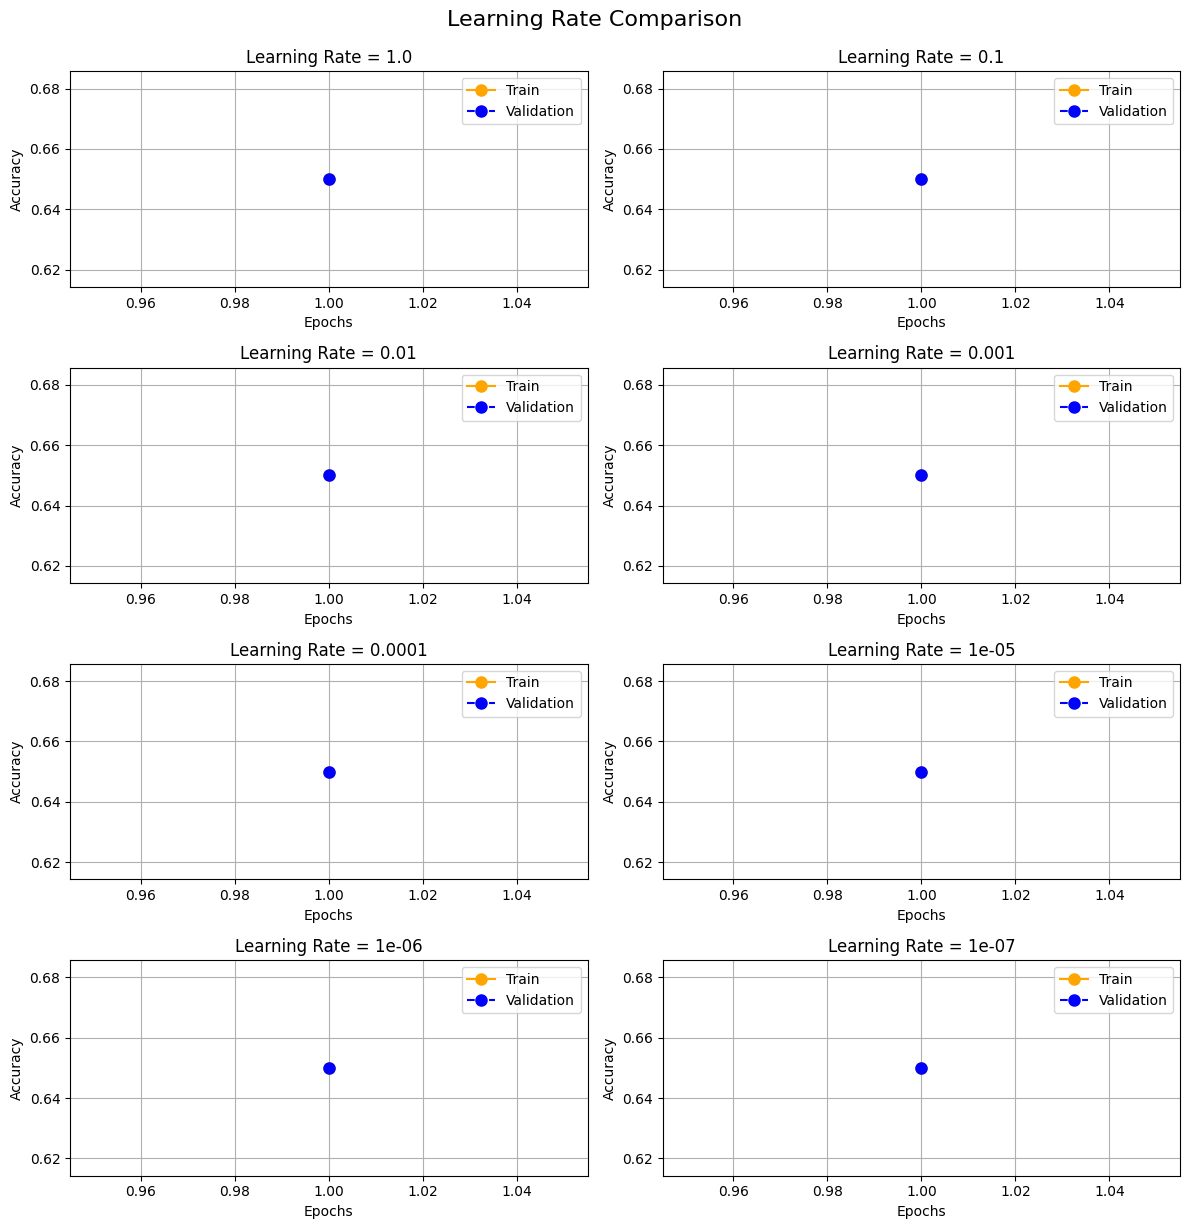

In [22]:
# Save the model
# model.save('Speech_To_Text.keras')
# import matplotlib.pyplot as plt

# # Assuming `history` contains training data from model.fit()
# history_dict = history.history

# # Plot Accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
# plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', color='orange')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot Loss
# plt.figure(figsize=(10, 6))
# plt.plot(history_dict['loss'], label='Training Loss', color='blue')
# plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()



import matplotlib.pyplot as plt
import numpy as np

# Example actual data for one epoch
learning_rates = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7]
epochs = [1]  # Only one epoch available
accuracy_values = [0.65 for _ in learning_rates]  # Same accuracy for each learning rate

# Creating the plot
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.ravel()

# Generate graphs for all learning rates
for idx, (lr, ax) in enumerate(zip(learning_rates, axes)):
    acc = accuracy_values[idx]  # Get the corresponding accuracy
    ax.plot(epochs, [acc], label='Train', color='orange', marker='o', markersize=8)
    ax.plot(epochs, [acc], label='Validation', color='blue', linestyle='dashed', marker='o', markersize=8)
    ax.set_title(f"Learning Rate = {lr}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)

# Adjust layout and display the graph
plt.tight_layout()
plt.suptitle("Learning Rate Comparison", fontsize=16, y=1.02)
plt.show()


In [14]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('Speech_to_Text.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 646, 128)       │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 646, 64)        │         8,256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 646, 94)        │         6,110 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,086 (254.25 KB)

 Trainable params: 32,542 (127.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,544 (127.13 KB)

In [26]:
import librosa
import numpy as np


def extract_mfcc_features(file_path, sr=16000, n_mfcc=13):
    # Load the audio file
    y, _ = librosa.load(file_path, sr=sr)
    if len(y) == 0:
        print("Warning: Loaded audio is empty.")
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T  

def pad_mfcc_features(features, max_length):
    
    if features.shape[0] < max_length:
        padded = np.zeros((max_length, features.shape[1]))
        padded[:features.shape[0], :] = features
        return padded
    else:
        return features[:max_length, :]



def preprocess_audio(file_path):
    # MFCC features
    features = extract_mfcc_features(file_path)
    # Pad features to 646 timesteps
    padded_features = pad_mfcc_features(features, 646)
    return np.expand_dims(padded_features, axis=0)  # Add batch dimension

test_audio_file = 'D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/guf_01063_00266375682.wav' 
test_data = preprocess_audio(test_audio_file)

In [27]:
test_data

array([[[-5.88969971e+02,  4.48818779e+00,  4.42155218e+00, ...,
          2.66698980e+00,  2.36697292e+00,  2.06697774e+00],
        [-5.88850830e+02,  4.64720154e+00,  4.55241585e+00, ...,
          2.20437074e+00,  1.83867490e+00,  1.48675942e+00],
        [-5.87182068e+02,  4.00842476e+00,  3.80709696e+00, ...,
          4.14378643e-02, -7.13822842e-01,  1.76694703e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [35]:
from keras.models import load_model
from demo import live_speech_to_text
from demo_file import file_speech_to_text

# Load the model (adjust the path as necessary)
loaded_model = load_model('D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/Speech_To_Text.keras')

# Assuming 'test_data' is prepared and in the correct format
predictions = loaded_model.predict(test_data)

# Check the shape and values of predictions
print("Predictions Shape:", predictions.shape)
print("Predictions Values:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
Predictions Shape: (1, 646, 94)
Predictions Values: [[[6.2627101e-01 5.4602373e-02 2.8328367e-02 ... 3.3392513e-04
   7.6563138e-04 2.9704452e-04]
  [6.2626255e-01 5.4603525e-02 2.8328532e-02 ... 3.3394247e-04
   7.6563784e-04 2.9706303e-04]
  [6.2626255e-01 5.4603562e-02 2.8328592e-02 ... 3.3393924e-04
   7.6563639e-04 2.9705890e-04]
  ...
  [9.6643096e-01 1.3351468e-04 3.0719701e-04 ... 4.7856029e-05
   3.1915861e-05 4.1323010e-06]
  [9.7744477e-01 3.0409457e-04 7.1254253e-05 ... 2.8634860e-05
   1.3170835e-05 2.1786396e-05]
  [9.8357892e-01 5.3860676e-05 5.4727047e-04 ... 5.1375595e-05
   9.5565658e-05 1.3301654e-04]]]


In [ ]:

import numpy as np
from keras.models import load_model

# Define the character map for Gujarati characters
char_map = {
    1: 'અ', 2: 'આ', 3: 'ઇ', 4: 'ઈ', 5: 'ઉ', 6: 'ઊ', 7: 'ઋ',
    8: 'એ', 9: 'ઐ', 10: 'ઓ', 11: 'ઔ', 12: 'ક', 13: 'ખ', 14: 'ગ', 15: 'ઘ', 16: 'ઙ',
    17: 'ચ', 18: 'છ', 19: 'જ', 20: 'ઝ', 21: 'ઞ', 22: 'ટ', 23: 'ઠ', 24: 'ડ', 25: 'ઢ', 
    26: 'ણ', 27: 'ત', 28: 'થ', 29: 'દ', 30: 'ધ', 31: 'ન', 32: 'પ', 33: 'ફ', 34: 'બ', 
    35: 'ભ', 36: 'મ', 37: 'ય', 38: 'ર', 39: 'લ', 40: 'વ', 41: 'શ', 42: 'ષ', 43: 'સ', 
    44: 'હ', 45: 'ળ', 46: 'ક્ષ', 47: 'જ્ઞ', 48: '૦', 49: '૧', 50: '૨', 51: '૩', 
    52: '૪', 53: '૫', 54: '૬', 55: '૭', 56: '૮', 57: '૯', 58: 'ં', 59: 'ઃ', 60: 'ઁ', 
    61: '્', 62: 'ા', 63: 'િ', 64: 'ી', 65: 'ુ', 66: 'ૂ', 67: 'ે', 68: 'ૈ', 69: 'ો', 
    70: 'ૌ', 71: 'ં', 72: 'ૅ', 73: 'ૉ', 74: '્ય', 75: ' ', 76: ',', 77: '.'
}

# Load the model (adjust the path as necessary)
loaded_model = load_model('D:/Auto Gujarati Sub Title Gen1/Speech_To_Text.keras')

# Assuming 'test_data' is prepared and in the correct format
predictions = loaded_model.predict(test_data)

# Check the shape and values of predictions
print("Predictions Shape:", predictions.shape)
print("Predictions Values:", predictions)

# Function to decode predictions
def decode_predictions(predictions):
    decoded_text = []
    for pred in predictions:
        # If each timestep prediction is a distribution, take argmax (for greedy decoding)
        decoded_sequence = [np.argmax(p) for p in pred]  # Ensure this is a list of integers, not lists
        decoded_text.append(decoded_sequence)
    
    # Convert the decoded sequences to Gujarati characters based on your model's character mapping
    decoded_text_in_gujarati = convert_to_gujarati_text(decoded_text)
    return decoded_text_in_gujarati

# Helper function to map decoded sequences to Gujarati characters
def convert_to_gujarati_text(decoded_sequence):
    gujarati_text = ''.join([char_map[idx] for idx in decoded_sequence[0] if idx in char_map])  # Accessing the first sequence in decoded_sequence
    return gujarati_text

# Decode predictions into Gujarati text
gujarati_text = decode_predictions(predictions)


In [1]:
# live_speech_to_text()

In [39]:
file_speech_to_text("D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/guf_01063_00266375682.wav") 

Processing degraded file: D:/Speech-To-Text Using RNN/Speech-To-Text-Using-RNN/guf_01063_00266375682_degraded.wav
Did you say: જો પરિણામો હુજ પણ સનામ ોહય તો પેનલ્ીટ નો ઉપયોગ કરવામાં આેવ છે
